In [1]:
## Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'C:\Users\wsaha\Documents\Hotel set'

In [3]:
#Import hotel data set with Latin -1 encoding

dfhotel = pd.read_csv(os.path.join(path, 'Data set', 'Original', 'Hotel_Dataset.csv'), encoding='latin-1')

In [4]:
#Cgecking the import

dfhotel.head()


,Booking ID,Date of Booking,Time,Customer ID,Gender,Age,Origin Country,State,Location,Destination Country,...,Check-Out Date,Rooms,Hotel Name,Hotel Rating,Payment Mode,Bank Name,Booking Price[SGD],Discount,GST,Profit Margin
0,DDMY00001,01/01/2010,10:49:40,MY00001,Male,42,Malaysia,Johor,Iskandar Puteri,Denmark,...,1/20/2010,1,Hotel Triton,4.3,Wallet,United Overseas Bank (UOB),243,1%,0.07,0.25
1,DDID00002,01/01/2010,09:19:47,ID00001,Female,44,Indonesia,Ciawi,West Java,Colombia,...,1/22/2010,2,Enchanted Isle,4.2,Wallet,EZ-Link,312,0%,0.07,0.24
2,DDSG00003,01/01/2010,11:52:56,SG00001,Female,31,Singapore,Central,Rochor,Germany,...,01/09/2010,2,Seacoast Hotel,4.5,Credit Card,Grab,338,19%,0.07,0.20
3,DDSG00004,01/01/2010,13:44:40,SG00002,Male,28,Singapore,North,Yishun,Canada,...,2/19/2010,2,Night In Paradise,4.2,Debit Card,DBS Paylah,254,19%,0.07,0.13
4,DDKH00005,01/01/2010,05:38:26,KH00001,Male,44,Cambodia,Phnom Trop,Pursat,Kenya,...,01/06/2010,3,Tiny Digs Hotel,4.6,Wallet,Bank of Singapore (BOS),313,15%,0.07,0.17


In [5]:
#Checking info on data frame

dfhotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66541 entries, 0 to 66540
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Booking ID           66541 non-null  object 
 1   Date of Booking      66541 non-null  object 
 2   Time                 66541 non-null  object 
 3   Customer ID          66541 non-null  object 
 4   Gender               66541 non-null  object 
 5   Age                  66541 non-null  int64  
 6   Origin Country       66541 non-null  object 
 7   State                66541 non-null  object 
 8   Location             66541 non-null  object 
 9   Destination Country  66541 non-null  object 
 10  Destination City     66541 non-null  object 
 11  No. Of People        66541 non-null  int64  
 12  Check-in date        66541 non-null  object 
 13  No of Days           66541 non-null  int64  
 14  Check-Out Date       66541 non-null  object 
 15  Rooms                66541 non-null 

In [6]:
duplicates = dfhotel[dfhotel.duplicated('Booking ID',keep=False)]

In [7]:
## Observinf duplicates
print(duplicates)

      Booking ID Date of Booking      Time Customer ID  Gender  Age  \
7      DDMY00008      01/01/2010  00:22:07     MY00002  Female   58   
6442   DDMY00008      01/01/2010  00:22:07     MY00002  Female   58   
22537  DDSG22537       3/23/2014  15:02:11     SG04062    Male   41   
22543  DDSG22537       3/23/2014  15:02:11     SG04062    Male   41   
34341  DDVN34340       2/23/2016  18:35:22     VN03010    Male   38   
42157  DDVN34340       2/23/2016  18:35:22     VN03010    Male   38   
42168  DDVN34340       2/23/2016  18:35:22     VN03010    Male   38   
50741  DDKH50738       4/14/2018  21:41:54     KH04520    Male   46   
55346  DDKH50738       4/14/2018  21:41:54     KH04520    Male   46   

      Origin Country      State Location Destination Country  ...  \
7           Malaysia    Sarawak  Kuching               Egypt  ...   
6442        Malaysia    Sarawak  Kuching               Egypt  ...   
22537      Singapore    Central  Geylang             Germany  ...   
22543      Si

In [8]:
## removing duplicates

dfhotel_no_dup = dfhotel.drop_duplicates('Booking ID', keep = 'first')

In [9]:
dfhotel_no_dup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66536 entries, 0 to 66540
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Booking ID           66536 non-null  object 
 1   Date of Booking      66536 non-null  object 
 2   Time                 66536 non-null  object 
 3   Customer ID          66536 non-null  object 
 4   Gender               66536 non-null  object 
 5   Age                  66536 non-null  int64  
 6   Origin Country       66536 non-null  object 
 7   State                66536 non-null  object 
 8   Location             66536 non-null  object 
 9   Destination Country  66536 non-null  object 
 10  Destination City     66536 non-null  object 
 11  No. Of People        66536 non-null  int64  
 12  Check-in date        66536 non-null  object 
 13  No of Days           66536 non-null  int64  
 14  Check-Out Date       66536 non-null  object 
 15  Rooms                66536 non-null  int6

In [10]:
#Renaming collumns

dfhotel_no_dup.rename(columns={'Booking Price[SGD]': 'Price per day_Singapore_$', 'GST': 'GST_tax', 'Rooms': 'No_of_rooms'}, inplace=True)


C:\Users\wsaha\AppData\Local\Temp\ipykernel_940\556536037.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfhotel_no_dup.rename(columns={'Booking Price[SGD]': 'Price per day_Singapore_$', 'GST': 'GST_tax', 'Rooms': 'No_of_rooms'}, inplace=True)


In [11]:
dfhotel_no_dup.head()

,Booking ID,Date of Booking,Time,Customer ID,Gender,Age,Origin Country,State,Location,Destination Country,...,Check-Out Date,No_of_rooms,Hotel Name,Hotel Rating,Payment Mode,Bank Name,Price per day_Singapore_$,Discount,GST_tax,Profit Margin
0,DDMY00001,01/01/2010,10:49:40,MY00001,Male,42,Malaysia,Johor,Iskandar Puteri,Denmark,...,1/20/2010,1,Hotel Triton,4.3,Wallet,United Overseas Bank (UOB),243,1%,0.07,0.25
1,DDID00002,01/01/2010,09:19:47,ID00001,Female,44,Indonesia,Ciawi,West Java,Colombia,...,1/22/2010,2,Enchanted Isle,4.2,Wallet,EZ-Link,312,0%,0.07,0.24
2,DDSG00003,01/01/2010,11:52:56,SG00001,Female,31,Singapore,Central,Rochor,Germany,...,01/09/2010,2,Seacoast Hotel,4.5,Credit Card,Grab,338,19%,0.07,0.20
3,DDSG00004,01/01/2010,13:44:40,SG00002,Male,28,Singapore,North,Yishun,Canada,...,2/19/2010,2,Night In Paradise,4.2,Debit Card,DBS Paylah,254,19%,0.07,0.13
4,DDKH00005,01/01/2010,05:38:26,KH00001,Male,44,Cambodia,Phnom Trop,Pursat,Kenya,...,01/06/2010,3,Tiny Digs Hotel,4.6,Wallet,Bank of Singapore (BOS),313,15%,0.07,0.17


In [12]:
#Checking for missing values

missing_values = dfhotel_no_dup.isnull().sum()


In [13]:
## No missing values

print(missing_values)

Booking ID                   0
Date of Booking              0
Time                         0
Customer ID                  0
Gender                       0
Age                          0
Origin Country               0
State                        0
Location                     0
Destination Country          0
Destination City             0
No. Of People                0
Check-in date                0
No of Days                   0
Check-Out Date               0
No_of_rooms                  0
Hotel Name                   0
Hotel Rating                 0
Payment Mode                 0
Bank Name                    0
Price per day_Singapore_$    0
Discount                     0
GST_tax                      0
Profit Margin                0
dtype: int64


In [14]:
## Dropiing unnecessary collumns

Drop_collumns = ['Location', 'Check-in date','Check-Out Date','GST_tax']

In [15]:
dfhotel_no_dup.drop(columns = Drop_collumns, inplace=True)

C:\Users\wsaha\AppData\Local\Temp\ipykernel_940\156611523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfhotel_no_dup.drop(columns = Drop_collumns, inplace=True)


In [16]:
dfhotel_no_dup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66536 entries, 0 to 66540
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Booking ID                 66536 non-null  object 
 1   Date of Booking            66536 non-null  object 
 2   Time                       66536 non-null  object 
 3   Customer ID                66536 non-null  object 
 4   Gender                     66536 non-null  object 
 5   Age                        66536 non-null  int64  
 6   Origin Country             66536 non-null  object 
 7   State                      66536 non-null  object 
 8   Destination Country        66536 non-null  object 
 9   Destination City           66536 non-null  object 
 10  No. Of People              66536 non-null  int64  
 11  No of Days                 66536 non-null  int64  
 12  No_of_rooms                66536 non-null  int64  
 13  Hotel Name                 66536 non-null  object 


In [17]:
dfhotel_no_dup.to_csv(os.path.join(path, 'Data set', 'Prepared', 'Df_hotel_cleaned.csv'))

In [18]:
# Checking for mixed data types

for col in dfhotel_no_dup.columns.tolist():
      weird = (dfhotel_no_dup[[col]].map(type) != dfhotel_no_dup[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (dfhotel_no_dup[weird]) > 0:
        print (col)
        

In [19]:
## No mixed values


In [20]:
 dfhotel_cleaned = dfhotel_no_dup

In [21]:
 dfhotel_cleaned.head()

,Booking ID,Date of Booking,Time,Customer ID,Gender,Age,Origin Country,State,Destination Country,Destination City,No. Of People,No of Days,No_of_rooms,Hotel Name,Hotel Rating,Payment Mode,Bank Name,Price per day_Singapore_$,Discount,Profit Margin
0,DDMY00001,01/01/2010,10:49:40,MY00001,Male,42,Malaysia,Johor,Denmark,Horsens,1,8,1,Hotel Triton,4.3,Wallet,United Overseas Bank (UOB),243,1%,0.25
1,DDID00002,01/01/2010,09:19:47,ID00001,Female,44,Indonesia,Ciawi,Colombia,Medellin,3,1,2,Enchanted Isle,4.2,Wallet,EZ-Link,312,0%,0.24
2,DDSG00003,01/01/2010,11:52:56,SG00001,Female,31,Singapore,Central,Germany,Munich,3,7,2,Seacoast Hotel,4.5,Credit Card,Grab,338,19%,0.20
3,DDSG00004,01/01/2010,13:44:40,SG00002,Male,28,Singapore,North,Canada,Montreal,3,4,2,Night In Paradise,4.2,Debit Card,DBS Paylah,254,19%,0.13
4,DDKH00005,01/01/2010,05:38:26,KH00001,Male,44,Cambodia,Phnom Trop,Kenya,Nairobi,5,3,3,Tiny Digs Hotel,4.6,Wallet,Bank of Singapore (BOS),313,15%,0.17


In [22]:
#Create new collumn Price of room per day

dfhotel_cleaned['Price of Room per Day'] = dfhotel_cleaned['Price per day_Singapore_$'] / dfhotel_cleaned['No_of_rooms']

C:\Users\wsaha\AppData\Local\Temp\ipykernel_940\91059328.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfhotel_cleaned['Price of Room per Day'] = dfhotel_cleaned['Price per day_Singapore_$'] / dfhotel_cleaned['No_of_rooms']


In [23]:
#Create new collumn Total price

dfhotel_cleaned['Total Price'] = dfhotel_cleaned['Price of Room per Day'] * dfhotel_cleaned['No of Days']

C:\Users\wsaha\AppData\Local\Temp\ipykernel_940\736802468.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfhotel_cleaned['Total Price'] = dfhotel_cleaned['Price of Room per Day'] * dfhotel_cleaned['No of Days']


In [24]:
dfhotel_cleaned.head()

,Booking ID,Date of Booking,Time,Customer ID,Gender,Age,Origin Country,State,Destination Country,Destination City,...,No_of_rooms,Hotel Name,Hotel Rating,Payment Mode,Bank Name,Price per day_Singapore_$,Discount,Profit Margin,Price of Room per Day,Total Price
0,DDMY00001,01/01/2010,10:49:40,MY00001,Male,42,Malaysia,Johor,Denmark,Horsens,...,1,Hotel Triton,4.3,Wallet,United Overseas Bank (UOB),243,1%,0.25,243.000000,1944.0
1,DDID00002,01/01/2010,09:19:47,ID00001,Female,44,Indonesia,Ciawi,Colombia,Medellin,...,2,Enchanted Isle,4.2,Wallet,EZ-Link,312,0%,0.24,156.000000,156.0
2,DDSG00003,01/01/2010,11:52:56,SG00001,Female,31,Singapore,Central,Germany,Munich,...,2,Seacoast Hotel,4.5,Credit Card,Grab,338,19%,0.20,169.000000,1183.0
3,DDSG00004,01/01/2010,13:44:40,SG00002,Male,28,Singapore,North,Canada,Montreal,...,2,Night In Paradise,4.2,Debit Card,DBS Paylah,254,19%,0.13,127.000000,508.0
4,DDKH00005,01/01/2010,05:38:26,KH00001,Male,44,Cambodia,Phnom Trop,Kenya,Nairobi,...,3,Tiny Digs Hotel,4.6,Wallet,Bank of Singapore (BOS),313,15%,0.17,104.333333,313.0


In [25]:
##Descriptive analysis of the data set

dfhotel_cleaned.describe()

,Age,No. Of People,No of Days,No_of_rooms,Hotel Rating,Price per day_Singapore_$,Profit Margin,Price of Room per Day,Total Price
count,66536.000000,66536.000000,66536.000000,66536.000000,66536.000000,66536.000000,66536.000000,66536.000000,66536.000000
mean,38.435749,3.995807,3.233753,2.283380,4.288508,214.053730,0.188816,120.016938,382.728085
std,11.557706,2.000135,3.377925,1.031159,0.275518,108.126539,0.052766,92.845079,593.411295
min,-5.000000,1.000000,1.000000,1.000000,3.300000,35.000000,0.100000,8.750000,8.750000
25%,28.000000,2.000000,1.000000,1.000000,4.200000,125.000000,0.140000,53.666667,94.000000
50%,38.000000,4.000000,2.000000,2.000000,4.300000,199.000000,0.200000,92.666667,199.500000
75%,48.000000,6.000000,4.000000,3.000000,4.500000,293.000000,0.230000,156.000000,440.000000
max,58.000000,7.000000,97.000000,4.000000,4.700000,578.000000,0.300000,575.000000,22824.000000


In [26]:
## checking age -5 value

age_check =  dfhotel_cleaned.sort_values(by='Age')


In [27]:
age_check.head(5)

,Booking ID,Date of Booking,Time,Customer ID,Gender,Age,Origin Country,State,Destination Country,Destination City,...,No_of_rooms,Hotel Name,Hotel Rating,Payment Mode,Bank Name,Price per day_Singapore_$,Discount,Profit Margin,Price of Room per Day,Total Price
66530,DDBH66567,12/31/2019,4:54:08 AM,DF12345,Male,-5,Singapore,East,India,Delhi,...,1,The Royal Sea Resort,4.3,Wallet,DBS Bank,182,6%,0.24,182.0,182.0
21300,DDVN21300,01/05/2014,14:21:04,VN01856,Female,19,Vietnam,Thach Thanh,India,Chandigarh,...,1,Alaska Island Resort,4.6,Credit Card,Grab,241,14%,0.16,241.0,964.0
38229,DDTH38228,10/10/2016,10:59:33,TH07005,Female,19,Thailand,Sakon Nakhon,Israel,Beersheba,...,1,The Lucky Rabbit B&B,4.2,Debit Card,DBS Paylah,439,7%,0.24,439.0,3073.0
24163,DDID24162,07/03/2014,03:14:44,ID04347,Male,19,Indonesia,Senayan,Colombia,Bogota,...,1,Signature San Francisco,4.7,Wallet,HSBC,269,9%,0.25,269.0,1883.0
3846,DDID03847,10/16/2010,01:40:40,ID00690,Male,19,Indonesia,Banti,Brazil,Belo Horizonte,...,3,The Hay-Adams,4.7,Internet Banking,DBS Paylah,309,13%,0.25,103.0,103.0


In [28]:
#replace -5 with lowest age 19 , Use .loc to avoid SettingWithCopyWarning

dfhotel_cleaned.loc[dfhotel_cleaned['Age'] == -5, 'Age'] = 19

In [29]:
dfhotel_cleaned = dfhotel_cleaned.copy()

# Remove '%' and convert to numeric
dfhotel_cleaned['Discount'] = pd.to_numeric(dfhotel_cleaned['Discount'].str.rstrip('%'), errors='coerce') / 100

In [30]:
dfhotel_cleaned.head()

,Booking ID,Date of Booking,Time,Customer ID,Gender,Age,Origin Country,State,Destination Country,Destination City,...,No_of_rooms,Hotel Name,Hotel Rating,Payment Mode,Bank Name,Price per day_Singapore_$,Discount,Profit Margin,Price of Room per Day,Total Price
0,DDMY00001,01/01/2010,10:49:40,MY00001,Male,42,Malaysia,Johor,Denmark,Horsens,...,1,Hotel Triton,4.3,Wallet,United Overseas Bank (UOB),243,0.01,0.25,243.000000,1944.0
1,DDID00002,01/01/2010,09:19:47,ID00001,Female,44,Indonesia,Ciawi,Colombia,Medellin,...,2,Enchanted Isle,4.2,Wallet,EZ-Link,312,0.00,0.24,156.000000,156.0
2,DDSG00003,01/01/2010,11:52:56,SG00001,Female,31,Singapore,Central,Germany,Munich,...,2,Seacoast Hotel,4.5,Credit Card,Grab,338,0.19,0.20,169.000000,1183.0
3,DDSG00004,01/01/2010,13:44:40,SG00002,Male,28,Singapore,North,Canada,Montreal,...,2,Night In Paradise,4.2,Debit Card,DBS Paylah,254,0.19,0.13,127.000000,508.0
4,DDKH00005,01/01/2010,05:38:26,KH00001,Male,44,Cambodia,Phnom Trop,Kenya,Nairobi,...,3,Tiny Digs Hotel,4.6,Wallet,Bank of Singapore (BOS),313,0.15,0.17,104.333333,313.0


In [31]:
#Checking for missing values

nan_counts = dfhotel_cleaned.isna().sum()

In [32]:
print(nan_counts)

Booking ID                   0
Date of Booking              0
Time                         0
Customer ID                  0
Gender                       0
Age                          0
Origin Country               0
State                        0
Destination Country          0
Destination City             0
No. Of People                0
No of Days                   0
No_of_rooms                  0
Hotel Name                   0
Hotel Rating                 0
Payment Mode                 0
Bank Name                    0
Price per day_Singapore_$    0
Discount                     0
Profit Margin                0
Price of Room per Day        0
Total Price                  0
dtype: int64


# <span style="color:black">Expolring relationships</span>

In [33]:
#Descriptive analysis

dfhotel_cleaned.describe()

,Age,No. Of People,No of Days,No_of_rooms,Hotel Rating,Price per day_Singapore_$,Discount,Profit Margin,Price of Room per Day,Total Price
count,66536.000000,66536.000000,66536.000000,66536.000000,66536.000000,66536.000000,66536.000000,66536.000000,66536.000000,66536.000000
mean,38.436110,3.995807,3.233753,2.283380,4.288508,214.053730,0.125472,0.188816,120.016938,382.728085
std,11.556725,2.000135,3.377925,1.031159,0.275518,108.126539,0.075114,0.052766,92.845079,593.411295
min,19.000000,1.000000,1.000000,1.000000,3.300000,35.000000,0.000000,0.100000,8.750000,8.750000
25%,28.000000,2.000000,1.000000,1.000000,4.200000,125.000000,0.060000,0.140000,53.666667,94.000000
50%,38.000000,4.000000,2.000000,2.000000,4.300000,199.000000,0.130000,0.200000,92.666667,199.500000
75%,48.000000,6.000000,4.000000,3.000000,4.500000,293.000000,0.190000,0.230000,156.000000,440.000000
max,58.000000,7.000000,97.000000,4.000000,4.700000,578.000000,0.250000,0.300000,575.000000,22824.000000


In [34]:
dfhotel_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66536 entries, 0 to 66540
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Booking ID                 66536 non-null  object 
 1   Date of Booking            66536 non-null  object 
 2   Time                       66536 non-null  object 
 3   Customer ID                66536 non-null  object 
 4   Gender                     66536 non-null  object 
 5   Age                        66536 non-null  int64  
 6   Origin Country             66536 non-null  object 
 7   State                      66536 non-null  object 
 8   Destination Country        66536 non-null  object 
 9   Destination City           66536 non-null  object 
 10  No. Of People              66536 non-null  int64  
 11  No of Days                 66536 non-null  int64  
 12  No_of_rooms                66536 non-null  int64  
 13  Hotel Name                 66536 non-null  object 


In [35]:
dfhotel_cleaned.describe()

,Age,No. Of People,No of Days,No_of_rooms,Hotel Rating,Price per day_Singapore_$,Discount,Profit Margin,Price of Room per Day,Total Price
count,66536.000000,66536.000000,66536.000000,66536.000000,66536.000000,66536.000000,66536.000000,66536.000000,66536.000000,66536.000000
mean,38.436110,3.995807,3.233753,2.283380,4.288508,214.053730,0.125472,0.188816,120.016938,382.728085
std,11.556725,2.000135,3.377925,1.031159,0.275518,108.126539,0.075114,0.052766,92.845079,593.411295
min,19.000000,1.000000,1.000000,1.000000,3.300000,35.000000,0.000000,0.100000,8.750000,8.750000
25%,28.000000,2.000000,1.000000,1.000000,4.200000,125.000000,0.060000,0.140000,53.666667,94.000000
50%,38.000000,4.000000,2.000000,2.000000,4.300000,199.000000,0.130000,0.200000,92.666667,199.500000
75%,48.000000,6.000000,4.000000,3.000000,4.500000,293.000000,0.190000,0.230000,156.000000,440.000000
max,58.000000,7.000000,97.000000,4.000000,4.700000,578.000000,0.250000,0.300000,575.000000,22824.000000


In [36]:
##Specifying collumns to correlate

Correlation_columns = ['Age', 'No. Of People', 'No of Days', 'No_of_rooms', 'Hotel Rating', 'Price per day_Singapore_$', 'Discount', 'Profit Margin','Price of Room per Day','Total Price']



In [37]:
#Correlation of specific columns

dfhotel_cleaned[Correlation_columns].corr()

,Age,No. Of People,No of Days,No_of_rooms,Hotel Rating,Price per day_Singapore_$,Discount,Profit Margin,Price of Room per Day,Total Price
Age,1.000000,0.006423,-0.005465,0.005582,0.001255,-0.002097,0.012938,-0.000402,-0.003122,-0.007264
No. Of People,0.006423,1.000000,0.000597,0.970775,0.000845,-0.001438,0.004689,0.005248,-0.619511,-0.308103
No of Days,-0.005465,0.000597,1.000000,0.000766,-0.004428,-0.024155,0.002036,0.000007,-0.017145,0.696785
No_of_rooms,0.005582,0.970775,0.000766,1.000000,0.001940,-0.003036,0.004242,0.003149,-0.626622,-0.311393
Hotel Rating,0.001255,0.000845,-0.004428,0.001940,1.000000,0.510179,0.004887,-0.484712,0.332349,0.160617
Price per day_Singapore_$,-0.002097,-0.001438,-0.024155,-0.003036,0.510179,1.000000,-0.002643,-0.163123,0.657824,0.309043
Discount,0.012938,0.004689,0.002036,0.004242,0.004887,-0.002643,1.000000,-0.003823,-0.005699,-0.001451
Profit Margin,-0.000402,0.005248,0.000007,0.003149,-0.484712,-0.163123,-0.003823,1.000000,-0.107192,-0.052412
Price of Room per Day,-0.003122,-0.619511,-0.017145,-0.626622,0.332349,0.657824,-0.005699,-0.107192,1.000000,0.480102
Total Price,-0.007264,-0.308103,0.696785,-0.311393,0.160617,0.309043,-0.001451,-0.052412,0.480102,1.000000


In [38]:
import matplotlib.pyplot as plt
import matplotlib


print(f"Matplotlib version: {matplotlib.__version__}")

Matplotlib version: 3.7.2


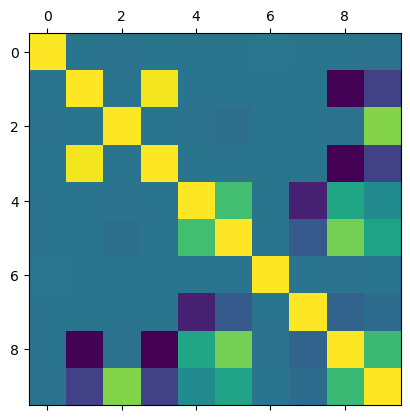

In [39]:
## Correlation heat map with matplotlib

plt.matshow(dfhotel_cleaned[Correlation_columns].corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

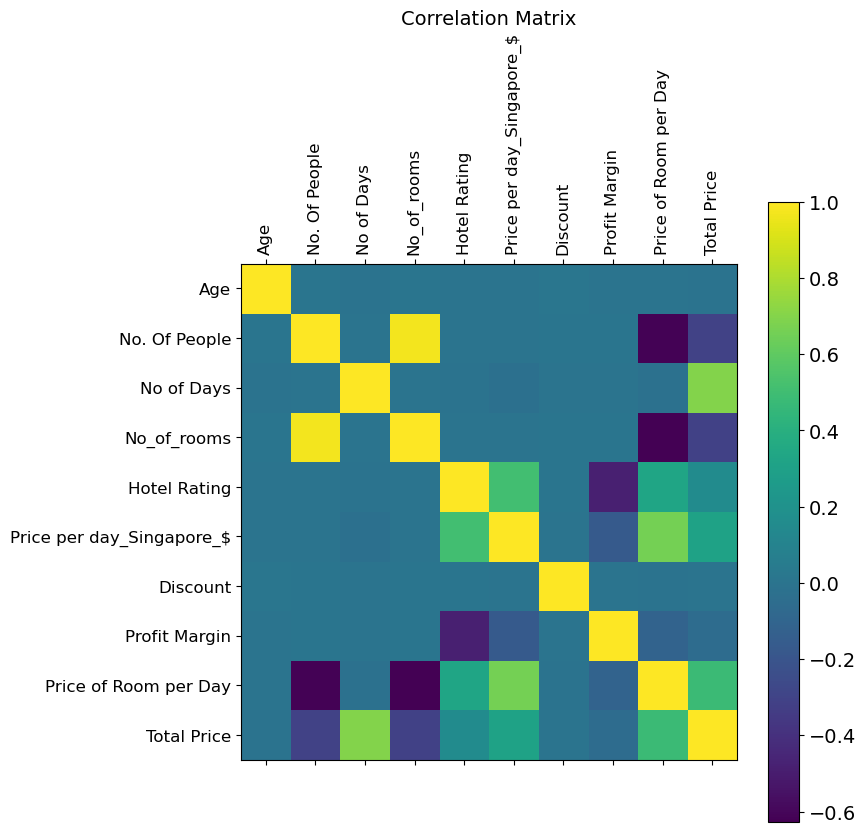

In [40]:
#Labeling

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(dfhotel_cleaned[Correlation_columns].corr(), fignum=f.number) # type of plot
plt.xticks(range(dfhotel_cleaned[Correlation_columns].corr().shape[1]), dfhotel_cleaned[Correlation_columns].corr().columns, fontsize=12, rotation=90) # x axis labels
plt.yticks(range(dfhotel_cleaned[Correlation_columns].corr().shape[1]), dfhotel_cleaned[Correlation_columns].corr().columns, fontsize=12) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14,) # add title

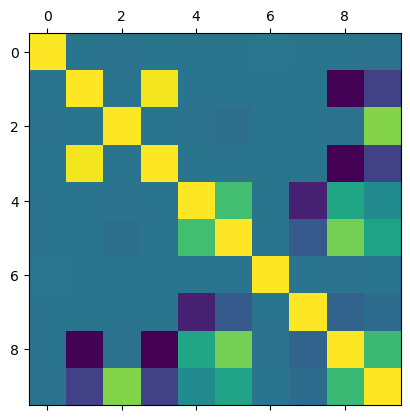

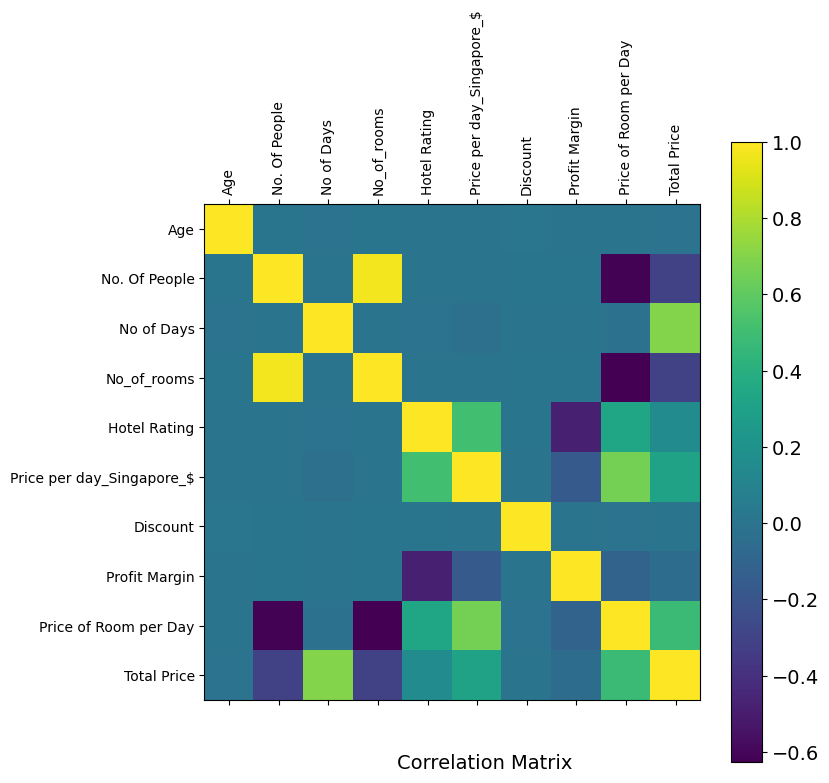

In [41]:
plt.matshow(dfhotel_cleaned[Correlation_columns].corr())

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(dfhotel_cleaned[Correlation_columns].corr(), fignum=f.number) # type of plot
plt.xticks(range(dfhotel_cleaned[Correlation_columns].corr().shape[1]), dfhotel_cleaned[Correlation_columns].corr().columns, fontsize=10, rotation=90) # x axis labels
plt.yticks(range(dfhotel_cleaned[Correlation_columns].corr().shape[1]), dfhotel_cleaned[Correlation_columns].corr().columns, fontsize=10) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.suptitle("Correlation Matrix", y=0.1, fontsize=14) # add title under the heat map y= value addition accordingly

#Saving the heat map 

plt.savefig("matplotlib_hear.png")

 # <span style="font-size:20px; color:green;">Correlation matrix :  : Indicates that there is a positive relationship between Price per day and hotel rating.  </span>

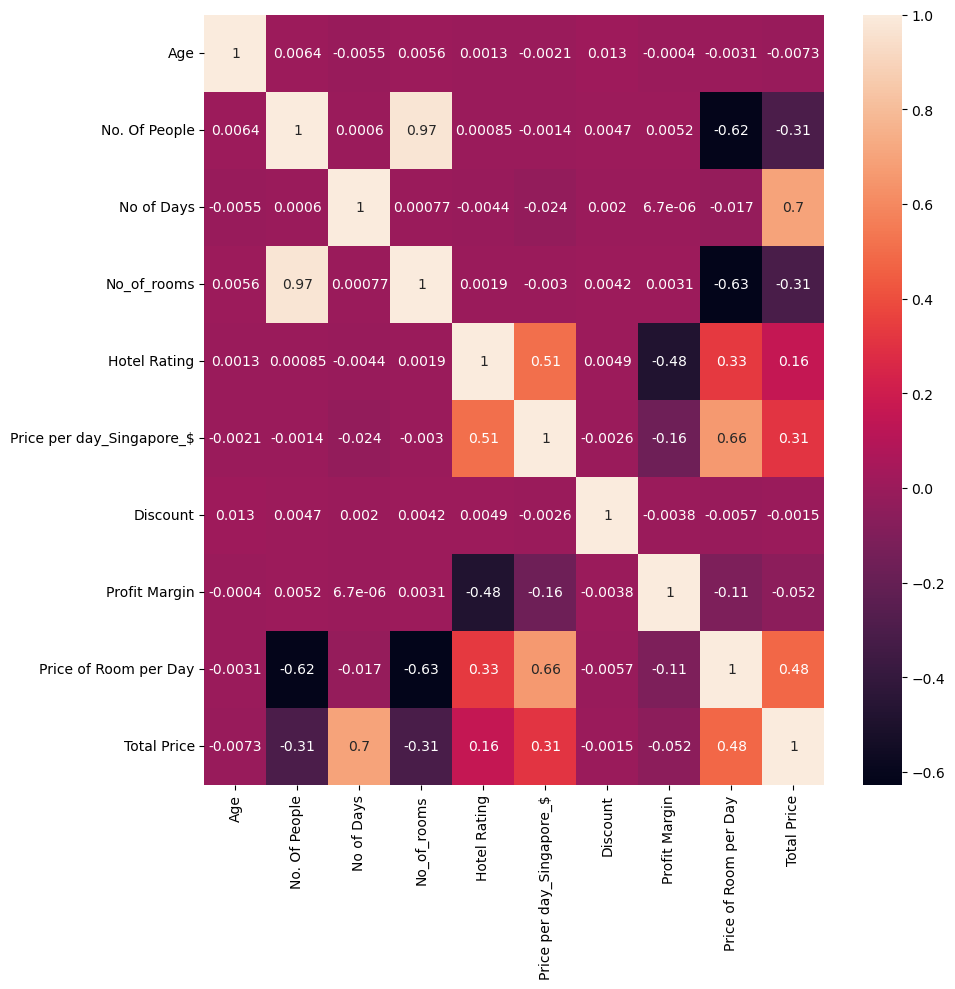

In [42]:
# Create a subplot with matplotlib for the heat map by 10*10

f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.

corr = sns.heatmap(dfhotel_cleaned[Correlation_columns].corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

plt.savefig('correlation_heatmap.png')

# <span style="font-size:20px; color:green;"> Matrix shows that Price per day and proce of room per day have moderate positive correlation with hotel rating and There is a moderate strong negative relationship between price of room per day and no of rooms booked and number of people stayed in hotel. Suprisingly there is a moderate negative relationship with hotel rating and profitability. Also negative relationship between No od people total price. Gurther this relationships are indicated in scatterplots below </span>

C:\Users\wsaha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


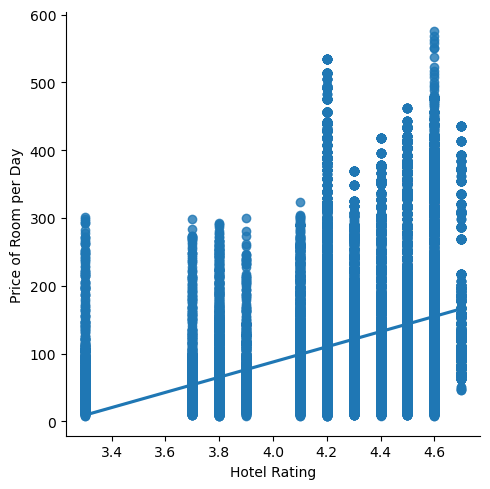

In [43]:
## Scatter plot for booking price and rating

sns.lmplot(x = 'Hotel Rating', y = 'Price of Room per Day', data = dfhotel_cleaned)


plt.savefig('Scatter Rating_vPrice.png')

C:\Users\wsaha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


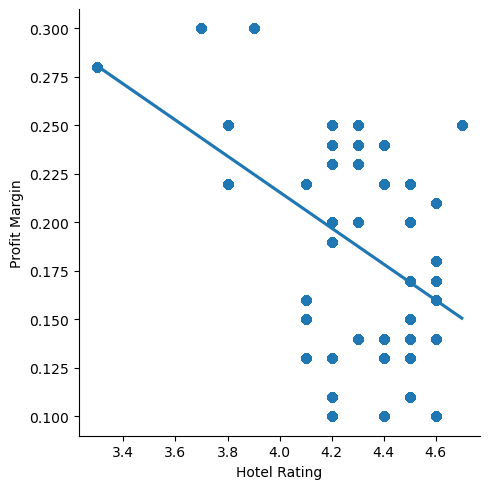

In [44]:
sns.lmplot(x = 'Hotel Rating', y = 'Profit Margin', data = dfhotel_cleaned)

plt.savefig('Scatter Rating_vprofit.png')

C:\Users\wsaha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\wsaha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\wsaha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\wsaha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

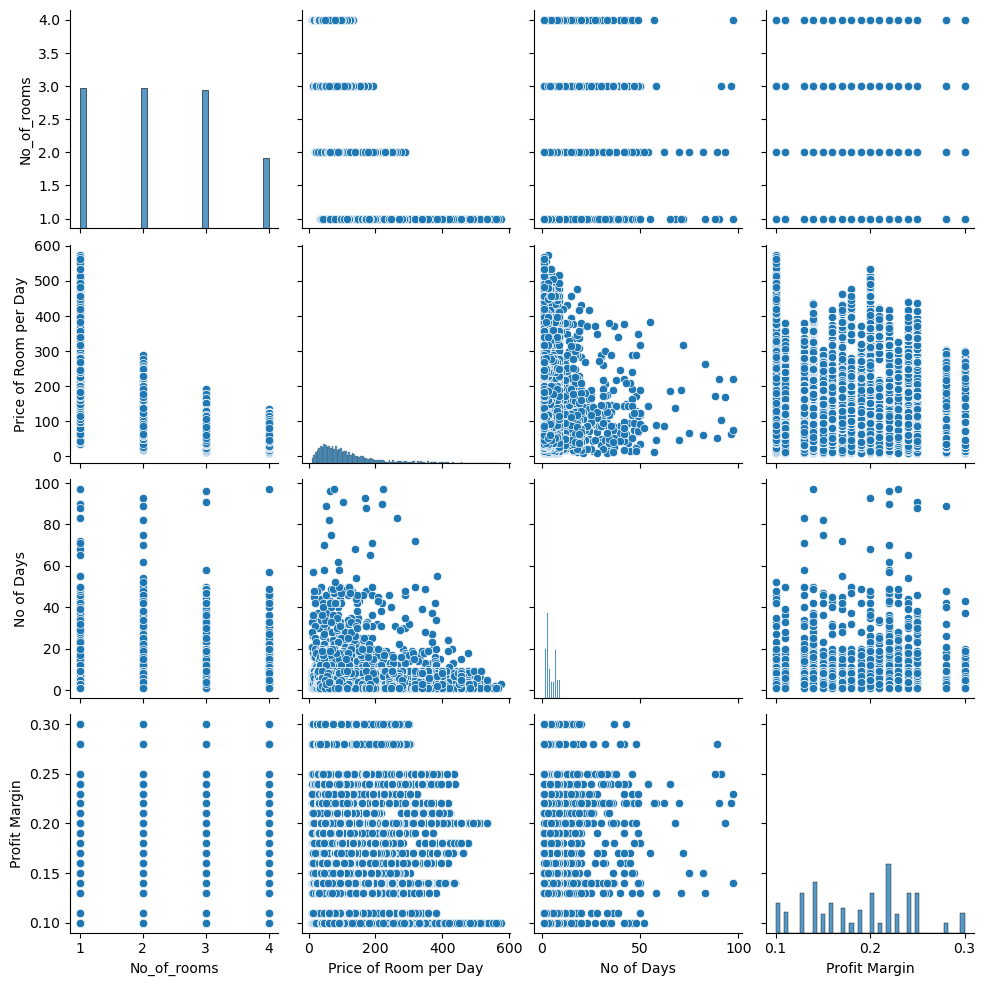

In [45]:
Sub_plot = dfhotel_cleaned[['No_of_rooms', 'Price of Room per Day', 'No of Days', 'Profit Margin']]

g = sns.pairplot(Sub_plot)

plt.savefig('pairplot.png')

# <span style="color:black">Categorical Plots</span>


C:\Users\wsaha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


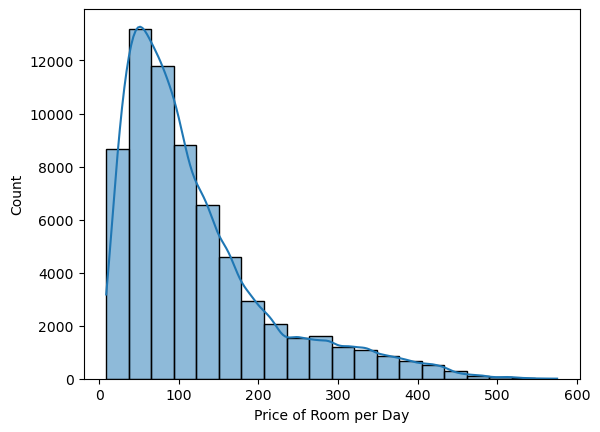

In [46]:
## Use a histogram to visualize the distribution of the variables. 

sns.histplot(dfhotel_cleaned['Price of Room per Day'], bins = 20, kde = True)

plt.savefig('histoprice.png')



# <span style="font-size:24px; color:green;">Graph indicates that more bookings has been done when price per night for a room is lower than 125 SGD and it tend to decrease as prices goes up</span>

In [47]:
dfhotel_cleaned.describe()

,Age,No. Of People,No of Days,No_of_rooms,Hotel Rating,Price per day_Singapore_$,Discount,Profit Margin,Price of Room per Day,Total Price
count,66536.000000,66536.000000,66536.000000,66536.000000,66536.000000,66536.000000,66536.000000,66536.000000,66536.000000,66536.000000
mean,38.436110,3.995807,3.233753,2.283380,4.288508,214.053730,0.125472,0.188816,120.016938,382.728085
std,11.556725,2.000135,3.377925,1.031159,0.275518,108.126539,0.075114,0.052766,92.845079,593.411295
min,19.000000,1.000000,1.000000,1.000000,3.300000,35.000000,0.000000,0.100000,8.750000,8.750000
25%,28.000000,2.000000,1.000000,1.000000,4.200000,125.000000,0.060000,0.140000,53.666667,94.000000
50%,38.000000,4.000000,2.000000,2.000000,4.300000,199.000000,0.130000,0.200000,92.666667,199.500000
75%,48.000000,6.000000,4.000000,3.000000,4.500000,293.000000,0.190000,0.230000,156.000000,440.000000
max,58.000000,7.000000,97.000000,4.000000,4.700000,578.000000,0.250000,0.300000,575.000000,22824.000000


In [48]:
## Setting up price category colllumn and flags

dfhotel_cleaned.loc[dfhotel_cleaned['Price of Room per Day'] < 150, 'Price Category'] = 'Low Price'
dfhotel_cleaned.loc[(dfhotel_cleaned['Price of Room per Day'] >= 150) & (dfhotel_cleaned['Price of Room per Day'] <= 350), 'Price Category'] = 'Mid Price'
dfhotel_cleaned.loc[dfhotel_cleaned['Price of Room per Day'] > 350, 'Price Category'] = 'High Price'

In [49]:
dfhotel_cleaned.head()

,Booking ID,Date of Booking,Time,Customer ID,Gender,Age,Origin Country,State,Destination Country,Destination City,...,Hotel Name,Hotel Rating,Payment Mode,Bank Name,Price per day_Singapore_$,Discount,Profit Margin,Price of Room per Day,Total Price,Price Category
0,DDMY00001,01/01/2010,10:49:40,MY00001,Male,42,Malaysia,Johor,Denmark,Horsens,...,Hotel Triton,4.3,Wallet,United Overseas Bank (UOB),243,0.01,0.25,243.000000,1944.0,Mid Price
1,DDID00002,01/01/2010,09:19:47,ID00001,Female,44,Indonesia,Ciawi,Colombia,Medellin,...,Enchanted Isle,4.2,Wallet,EZ-Link,312,0.00,0.24,156.000000,156.0,Mid Price
2,DDSG00003,01/01/2010,11:52:56,SG00001,Female,31,Singapore,Central,Germany,Munich,...,Seacoast Hotel,4.5,Credit Card,Grab,338,0.19,0.20,169.000000,1183.0,Mid Price
3,DDSG00004,01/01/2010,13:44:40,SG00002,Male,28,Singapore,North,Canada,Montreal,...,Night In Paradise,4.2,Debit Card,DBS Paylah,254,0.19,0.13,127.000000,508.0,Low Price
4,DDKH00005,01/01/2010,05:38:26,KH00001,Male,44,Cambodia,Phnom Trop,Kenya,Nairobi,...,Tiny Digs Hotel,4.6,Wallet,Bank of Singapore (BOS),313,0.15,0.17,104.333333,313.0,Low Price


In [50]:
dfhotel_cleaned['Price Category'].value_counts(dropna = False)

Price Category
Low Price     48909
Mid Price     15144
High Price     2483
Name: count, dtype: int64

C:\Users\wsaha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\wsaha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\wsaha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


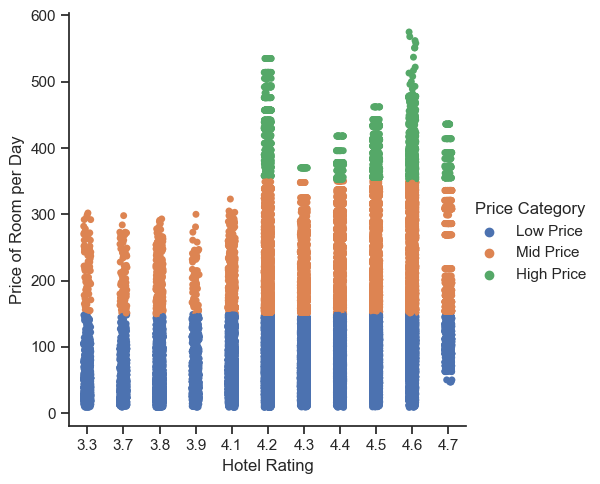

In [51]:
## create categorical plot

sns.set(style="ticks")
g = sns.catplot(x="Hotel Rating", y="Price of Room per Day", hue="Price Category", data=dfhotel_cleaned)

plt.savefig('categorical price rating.png')

# <span style="font-size:20px; color:green;">The graph indicates that when rating goes over 4.2, prices of room per day dent to increase and at 4.7 there are ery few low price rooms and more rooms costs over 250 SGD per day</span>
    

# <span style="font-size:24px; color:black;">Hypothesis 1 :</span>


# <span style="font-size:20px; color:black;"> "It is possible to position room per night at a higher price when customer ratings  are high but it resulted in low profit margin".</span>

In [52]:
dfhotel_no_dup.to_csv(os.path.join(path, 'Data set', 'Prepared', 'Df_hotel_cleaned.csv'))

# <span style="font-size:24px; color:black;">Further analysis on data set :</span>

In [54]:
dfhotel_no_dup.head()

,Booking ID,Date of Booking,Time,Customer ID,Gender,Age,Origin Country,State,Destination Country,Destination City,...,No_of_rooms,Hotel Name,Hotel Rating,Payment Mode,Bank Name,Price per day_Singapore_$,Discount,Profit Margin,Price of Room per Day,Total Price
0,DDMY00001,01/01/2010,10:49:40,MY00001,Male,42,Malaysia,Johor,Denmark,Horsens,...,1,Hotel Triton,4.3,Wallet,United Overseas Bank (UOB),243,1%,0.25,243.000000,1944.0
1,DDID00002,01/01/2010,09:19:47,ID00001,Female,44,Indonesia,Ciawi,Colombia,Medellin,...,2,Enchanted Isle,4.2,Wallet,EZ-Link,312,0%,0.24,156.000000,156.0
2,DDSG00003,01/01/2010,11:52:56,SG00001,Female,31,Singapore,Central,Germany,Munich,...,2,Seacoast Hotel,4.5,Credit Card,Grab,338,19%,0.20,169.000000,1183.0
3,DDSG00004,01/01/2010,13:44:40,SG00002,Male,28,Singapore,North,Canada,Montreal,...,2,Night In Paradise,4.2,Debit Card,DBS Paylah,254,19%,0.13,127.000000,508.0
4,DDKH00005,01/01/2010,05:38:26,KH00001,Male,44,Cambodia,Phnom Trop,Kenya,Nairobi,...,3,Tiny Digs Hotel,4.6,Wallet,Bank of Singapore (BOS),313,15%,0.17,104.333333,313.0


In [89]:
dfhotel_no_dup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66536 entries, 0 to 66540
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Booking ID                 66536 non-null  object 
 1   Date of Booking            66536 non-null  object 
 2   Time                       66536 non-null  object 
 3   Customer ID                66536 non-null  object 
 4   Gender                     66536 non-null  object 
 5   Age                        66536 non-null  int64  
 6   Origin Country             66536 non-null  object 
 7   State                      66536 non-null  object 
 8   Destination Country        66536 non-null  object 
 9   Destination City           66536 non-null  object 
 10  No. Of People              66536 non-null  int64  
 11  No of Days                 66536 non-null  int64  
 12  No_of_rooms                66536 non-null  int64  
 13  Hotel Name                 66536 non-null  object 


# <span style="font-size:16px; color:black;">So far the analysis has been conducted to see relationship between numerical data and from here the analysis is further looking in to other research questions:</span>

In [56]:
#1. Which countries have the highest hotel booking?
#2. What´s the favourite destination country for different nations?
#3. How does demographical elements impact hotel book?
#4. How different hotels are preferred among customers from the region?
#5. What are the durations of stays during trips?
#6. Which customers have booked most recurring bookings and their origins?
7#. What´s the relationship between hotel rating, price and booking frequency?

## We have looked in to Q7

7

# <span style="font-size:16px; color:black;">Which countries have the highest hotel booking?:</span>

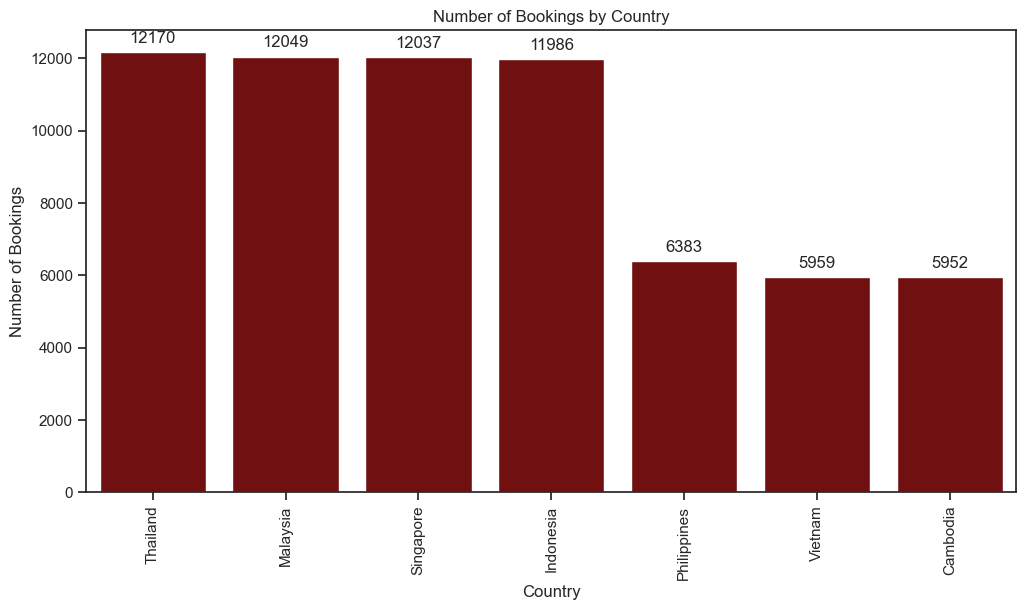

In [170]:
# obtaining value count

Country_booking_counts = dfhotel_no_dup['Origin Country'].value_counts() 

# Creating a bar chart
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x=Country_booking_counts.index, y=Country_booking_counts, color='maroon')

# Add value labels
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Number of Bookings by Country')
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=90)
plt.savefig('Number of Bookings by Country')
plt.show()


# <span style="font-size:16px; color:black;">What are favourite desitinations:</span>

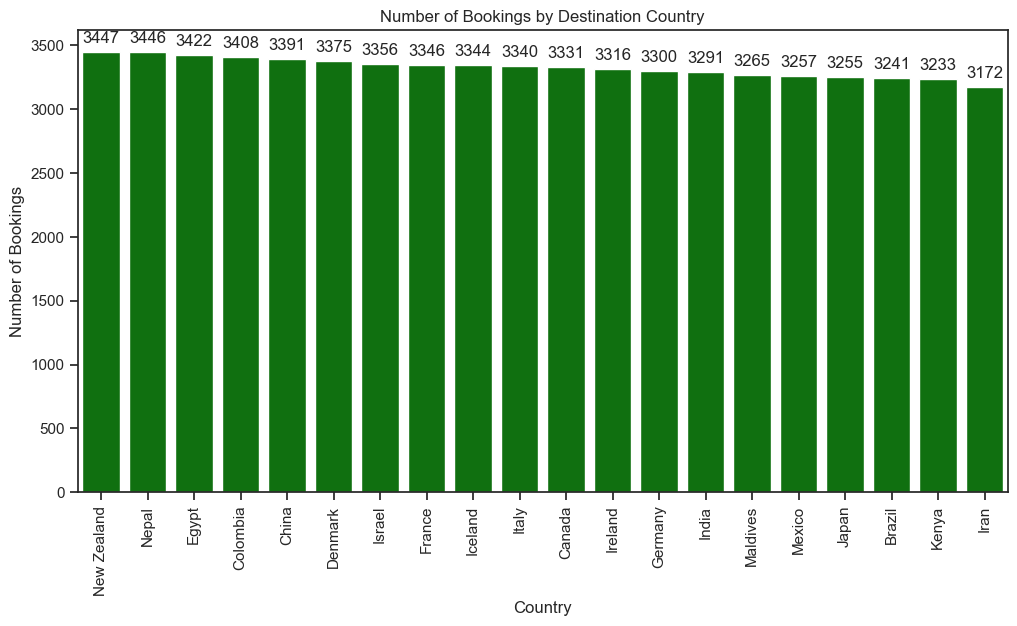

In [171]:
# obtaining value count

Country_booking_counts = dfhotel_no_dup['Destination Country'].value_counts() 

# Creating a bar chart
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x=Country_booking_counts.index, y=Country_booking_counts, color='Green')

# Add value labels
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Number of Bookings by Destination Country')
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=90)
plt.savefig('Number of Bookings by Destination Country')
plt.show()


# <span style="font-size:16px; color:black;">How does demographical elements impact hotel book?:</span>

# <span style="font-size:16px; color:black;">Age:</span>

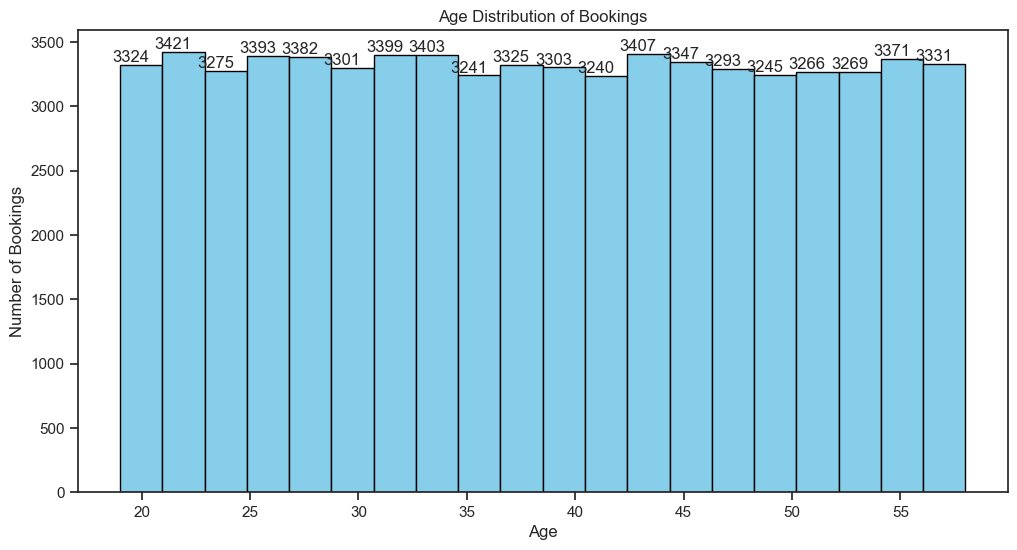

In [158]:
# Creating a histogram for age distribution

plt.figure(figsize=(12, 6))
n, bins, patches = plt.hist(dfhotel_no_dup['Age'], bins=20, color= 'skyblue', edgecolor='black')

plt.title('Age Distribution of Bookings')
plt.xlabel('Age')
plt.ylabel('Number of Bookings')

# Adding value labels to each bar
for count, bin_edge in zip(n, bins):
    plt.text(bin_edge + 0.5, count, str(int(count)), ha='center', va='bottom')
    
plt.savefig('Age Distribution of Bookings')


In [85]:
## It indicates that age has not criticalimpact onbooking

# <span style="font-size:16px; color:black;">Gender:</span>

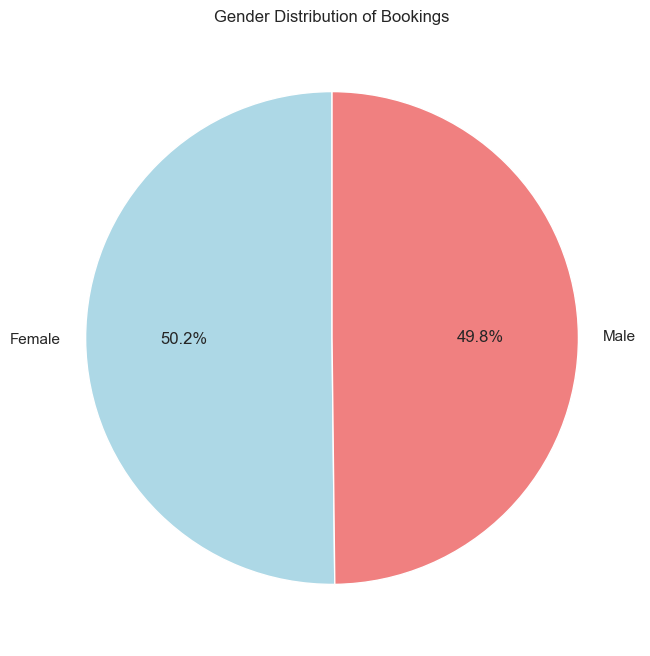

In [172]:


# Count occurrences for each gender
gender_counts = dfhotel_no_dup['Gender'].value_counts()

# Plotting  pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Gender Distribution of Bookings')
plt.savefig('Gender Distribution of Bookings')
plt.show()


In [87]:
## Again it shows that even femals have slightly higher booking percentage it is not significant

# <span style="font-size:16px; color:black;">No of people per booking:</span>

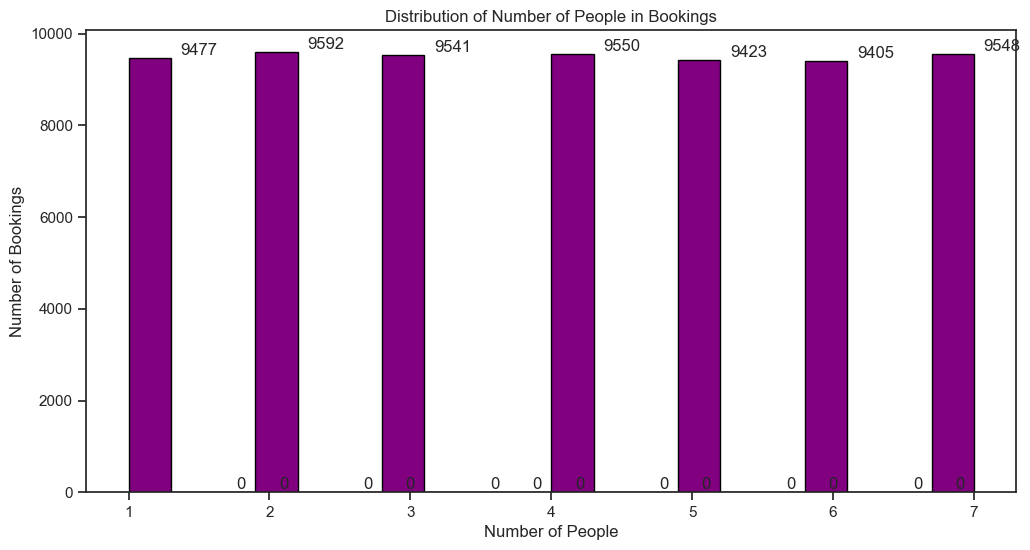

In [173]:
# Histogram for the distribution of the number of people

plt.figure(figsize=(12, 6))
n, bins, patches = plt.hist(dfhotel_no_dup['No. Of People'], bins=20, color='purple', edgecolor='black')

plt.title('Distribution of Number of People in Bookings')
plt.xlabel('Number of People')
plt.ylabel('Number of Bookings')

# Adding value labels to each bar
for count, bin_edge in zip(n, bins):
    plt.text(bin_edge + 0.5, count, str(int(count)), ha='center', va='bottom')

    plt.savefig('Distribution of Number of People in Bookings')
plt.show()



In [101]:
## No of people per booking also does not indicate significant difference for one category



 # <span style="font-size:16px; color:black;">Demographical data does not indicates clear significance in different groups and further can be analyse through customer profiling</span>



# <span style="font-size:16px; color:black;">4. How different hotels are preferred among customers from the region?</span>

C:\Users\wsaha\AppData\Local\Temp\ipykernel_940\1640874853.py:16: UserWarning: Glyph 146 (\x92) missing from current font.
  plt.savefig('Top 25 hotels by number of Bookings')
C:\Users\wsaha\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


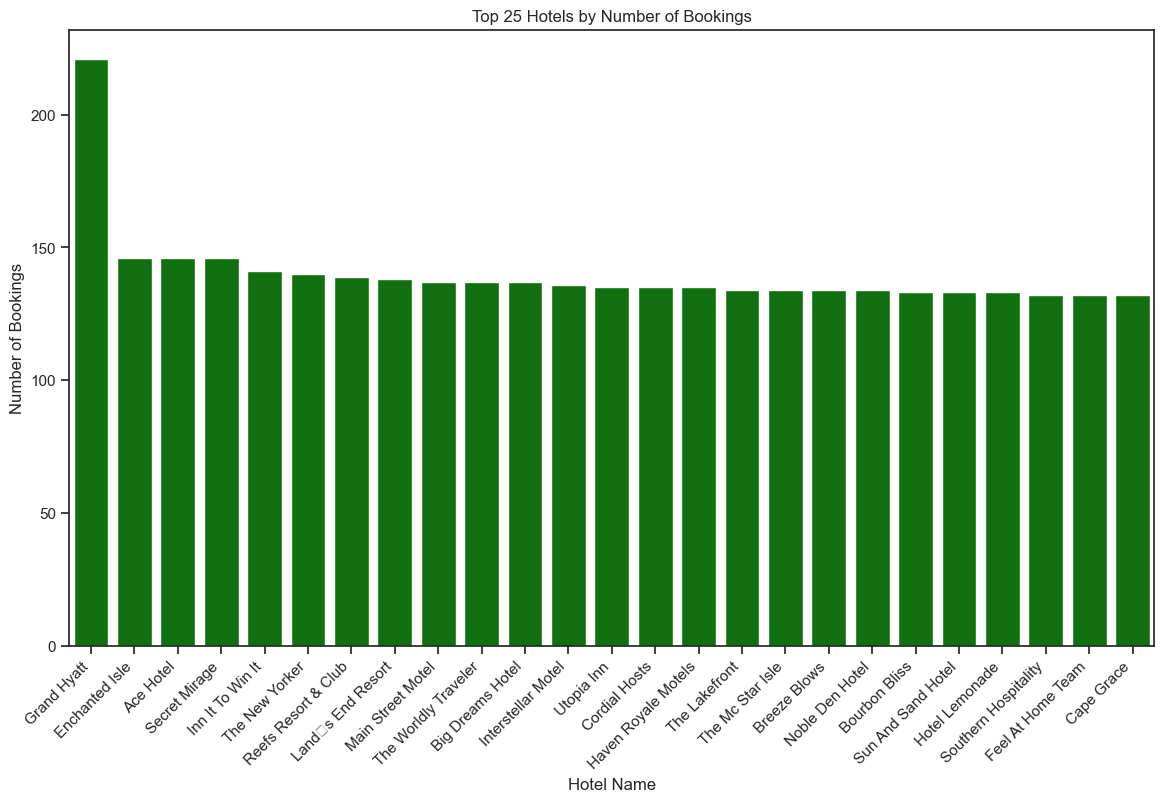

In [174]:
# Obtaining top 25 hotels

top_n = 25  # Choose the number of top hotels to display

# Count plot for the top N hotels in the main DataFrame


plt.figure(figsize=(14, 8))
sns.countplot(x='Hotel Name', data=dfhotel_no_dup, order=dfhotel_no_dup['Hotel Name'].value_counts().head(top_n).index, color='green')

plt.title(f'Top {top_n} Hotels by Number of Bookings')
plt.xlabel('Hotel Name')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability

plt.savefig('Top 25 hotels by number of Bookings')
plt.show()


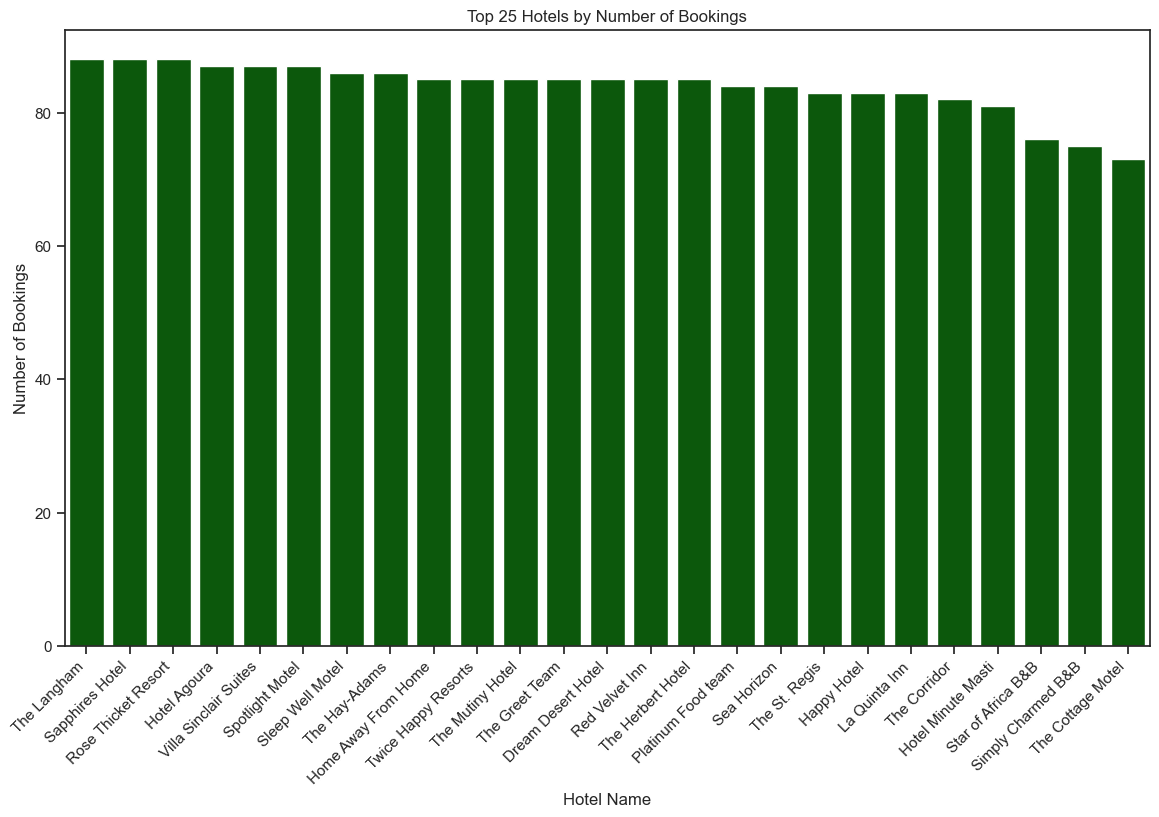

In [175]:
# Obtaining bottom 25 hotels

bottom_n = 25  # Choose the number of top hotels to display

# Count plot for the top N hotels in the main DataFrame


plt.figure(figsize=(14, 8))
sns.countplot(x='Hotel Name', data=dfhotel_no_dup, order=dfhotel_no_dup['Hotel Name'].value_counts().tail(bottom_n).index, color='darkgreen')

plt.title(f'Top {bottom_n} Hotels by Number of Bookings')
plt.xlabel('Hotel Name')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability

plt.savefig('bottom 25 hotels by number of Bookings')
plt.show()



In [120]:
## It indicates that Grand Hyatt is the most preffered and there is clear differentiation between top and bottom 25 hotels by booking numbers.
## This analysis could further conducted for different origin country bookin to observe patterns.




# <span style="font-size:16px; color:black;">Thailand</span>

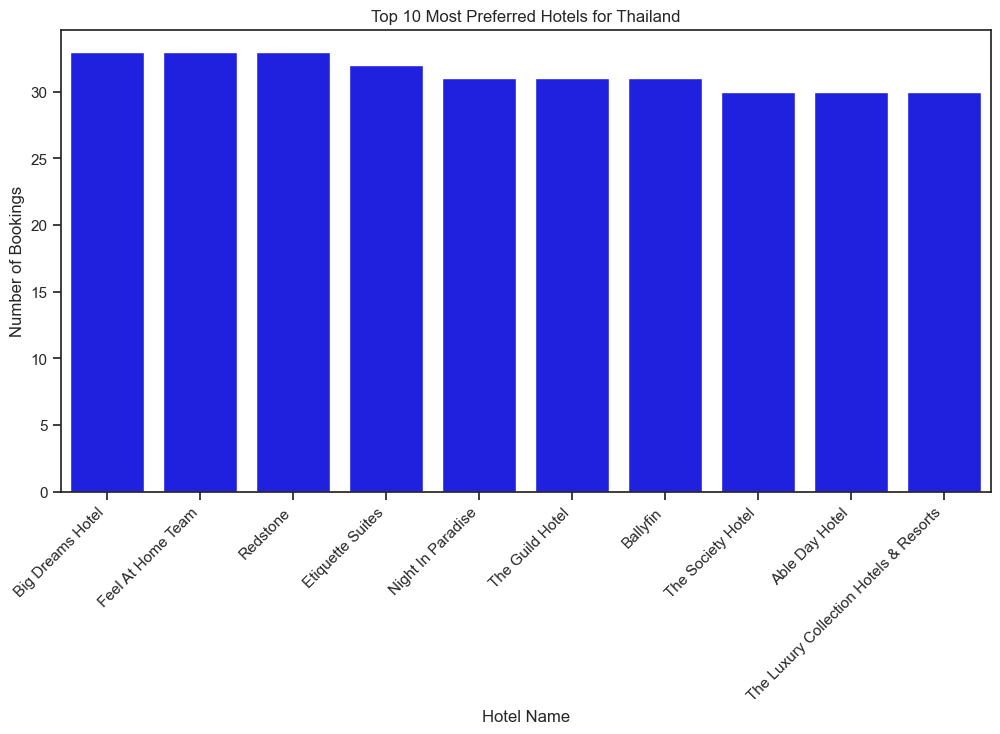

In [176]:
Bookings_from_thailand = dfhotel_no_dup[dfhotel_no_dup['Origin Country'] == 'Thailand']

# Get the top 10 most preferred hotels for Thailand tourists
Prefered_hotels_Thailand_tourists = Bookings_from_thailand['Hotel Name'].value_counts().head(10)

# Creating a count plot for the top 10 hotels in Thailand
plt.figure(figsize=(12, 6))
sns.barplot(x=Prefered_hotels_Thailand_tourists.index, y=Prefered_hotels_Thailand_tourists, color='blue')
plt.title('Top 10 Most Preferred Hotels for Thailand')
plt.xlabel('Hotel Name')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability

plt.savefig('Top 10 Most Preferred Hotels for Thailand')
plt.show()



# <span style="font-size:16px; color:black;">Malaysia</span>

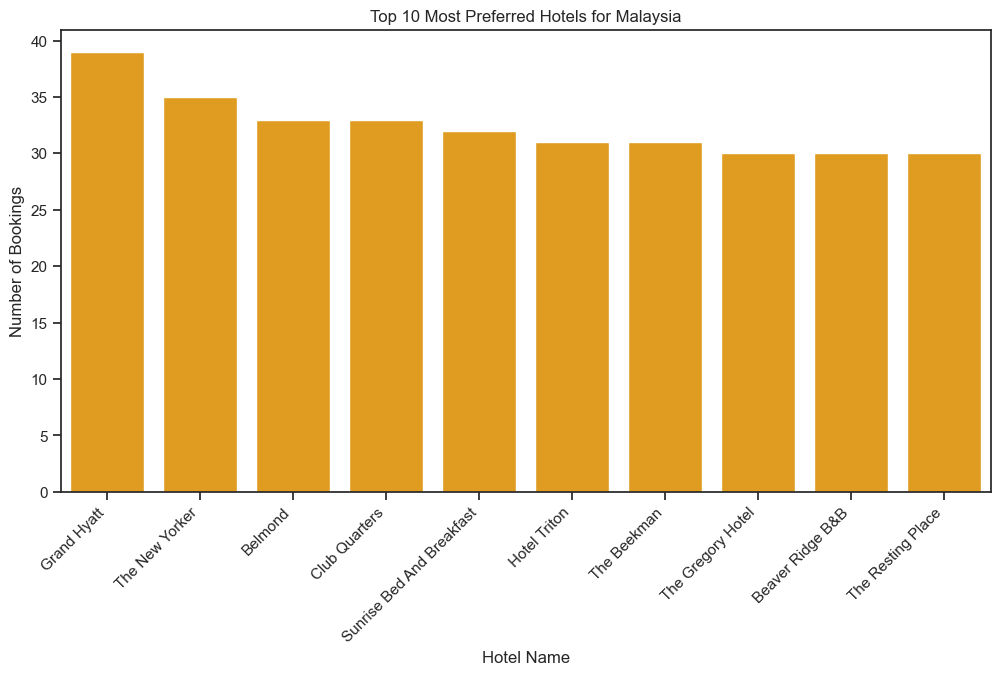

In [177]:
Bookings_from_Malaysia = dfhotel_no_dup[dfhotel_no_dup['Origin Country'] == 'Malaysia']

# Get the top 10 most preferred hotels for Thailand tourists
Prefered_hotels_Malaysian_tourists = Bookings_from_Malaysia['Hotel Name'].value_counts().head(10)

# Creating a count plot for the top 10 hotels in Thailand
plt.figure(figsize=(12, 6))
sns.barplot(x=Prefered_hotels_Malaysian_tourists.index, y=Prefered_hotels_Malaysian_tourists, color='orange')
plt.title('Top 10 Most Preferred Hotels for Malaysia')
plt.xlabel('Hotel Name')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability

plt.savefig('Top 10 Most Preferred Hotels for Malaysia')
plt.show()



# <span style="font-size:16px; color:black;">Conducting this analysis further can see how each country prefered different hotels and then look in to there prices which will give a good indicator for marketing state</span>



# <span style="font-size:16px; color:black;">What are the durations of stays during trips?</span>

C:\Users\wsaha\AppData\Local\Temp\ipykernel_940\4181229880.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfhotel_no_dup['Stay Duration Group'] = pd.cut(dfhotel_no_dup['No of Days'], bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, float('inf')],
C:\Users\wsaha\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


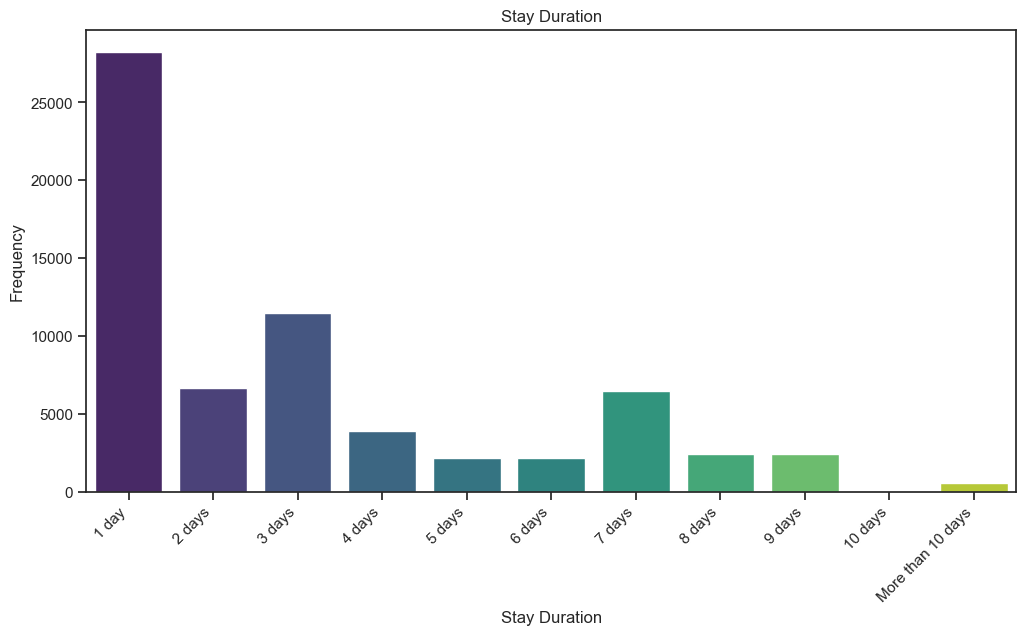

In [178]:
# Create a new column 'Stay Duration Group' to categorize stays

dfhotel_no_dup['Stay Duration Group'] = pd.cut(dfhotel_no_dup['No of Days'], bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, float('inf')],
                                               labels=['1 day', '2 days', '3 days', '4 days', '5 days', '6 days',
                                                       '7 days', '8 days', '9 days', '10 days', 'More than 10 days'])

# Count plot for the modified 'Stay Duration Group' column

plt.figure(figsize=(12, 6))
sns.countplot(x='Stay Duration Group', data=dfhotel_no_dup, palette='viridis')

plt.title('Stay Duration')
plt.xlabel('Stay Duration')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability

plt.savefig('Stay duration')
plt.show()



In [141]:
dfhotel_no_dup.head()

,Booking ID,Date of Booking,Time,Customer ID,Gender,Age,Origin Country,State,Destination Country,Destination City,...,Hotel Name,Hotel Rating,Payment Mode,Bank Name,Price per day_Singapore_$,Discount,Profit Margin,Price of Room per Day,Total Price,Stay Duration Group
0,DDMY00001,01/01/2010,10:49:40,MY00001,Male,42,Malaysia,Johor,Denmark,Horsens,...,Hotel Triton,4.3,Wallet,United Overseas Bank (UOB),243,1%,0.25,243.000000,1944.0,8 days
1,DDID00002,01/01/2010,09:19:47,ID00001,Female,44,Indonesia,Ciawi,Colombia,Medellin,...,Enchanted Isle,4.2,Wallet,EZ-Link,312,0%,0.24,156.000000,156.0,1 day
2,DDSG00003,01/01/2010,11:52:56,SG00001,Female,31,Singapore,Central,Germany,Munich,...,Seacoast Hotel,4.5,Credit Card,Grab,338,19%,0.20,169.000000,1183.0,7 days
3,DDSG00004,01/01/2010,13:44:40,SG00002,Male,28,Singapore,North,Canada,Montreal,...,Night In Paradise,4.2,Debit Card,DBS Paylah,254,19%,0.13,127.000000,508.0,4 days
4,DDKH00005,01/01/2010,05:38:26,KH00001,Male,44,Cambodia,Phnom Trop,Kenya,Nairobi,...,Tiny Digs Hotel,4.6,Wallet,Bank of Singapore (BOS),313,15%,0.17,104.333333,313.0,3 days


# <span style="font-size:16px; color:black;">This shows that short stays are the most popular. Need to further research reasons like is it due to business trips or so</span>

# <span style="font-size:16px; color:black;">Analysing origin and destination countries for one day trips</span>

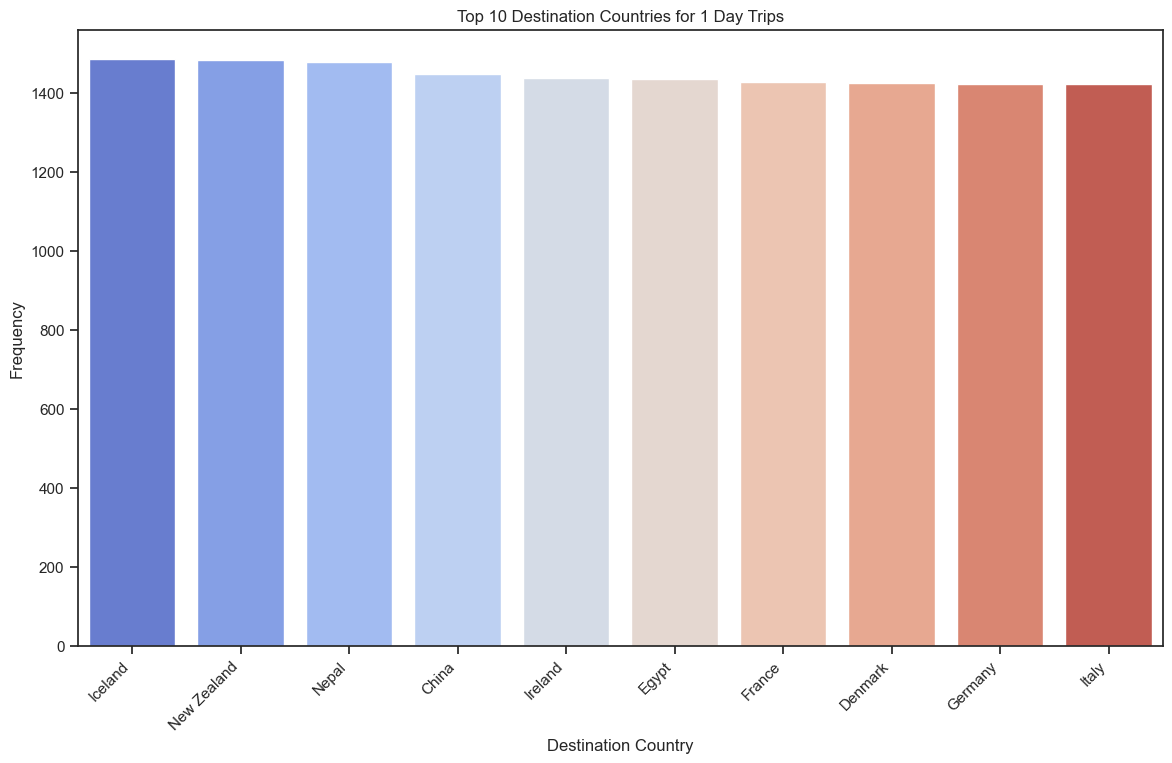

In [179]:
# Filtering data for stays of 1 day
stay_1_day_data = dfhotel_no_dup[dfhotel_no_dup['Stay Duration Group'] == '1 day']

# Getting the top 10 destination cities for 1 day trips
top_10_countries = stay_1_day_data['Destination Country'].value_counts().head(10)

# Count plot for the top 10 destination cities

plt.figure(figsize=(14, 8))
sns.barplot(x=top_10_countries.index, y=top_10_countries, palette='coolwarm')

plt.title('Top 10 Destination Countries for 1 Day Trips')
plt.xlabel('Destination Country')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability

plt.savefig('Top 10 Destination Countries for 1 Day Trips')
plt.show()



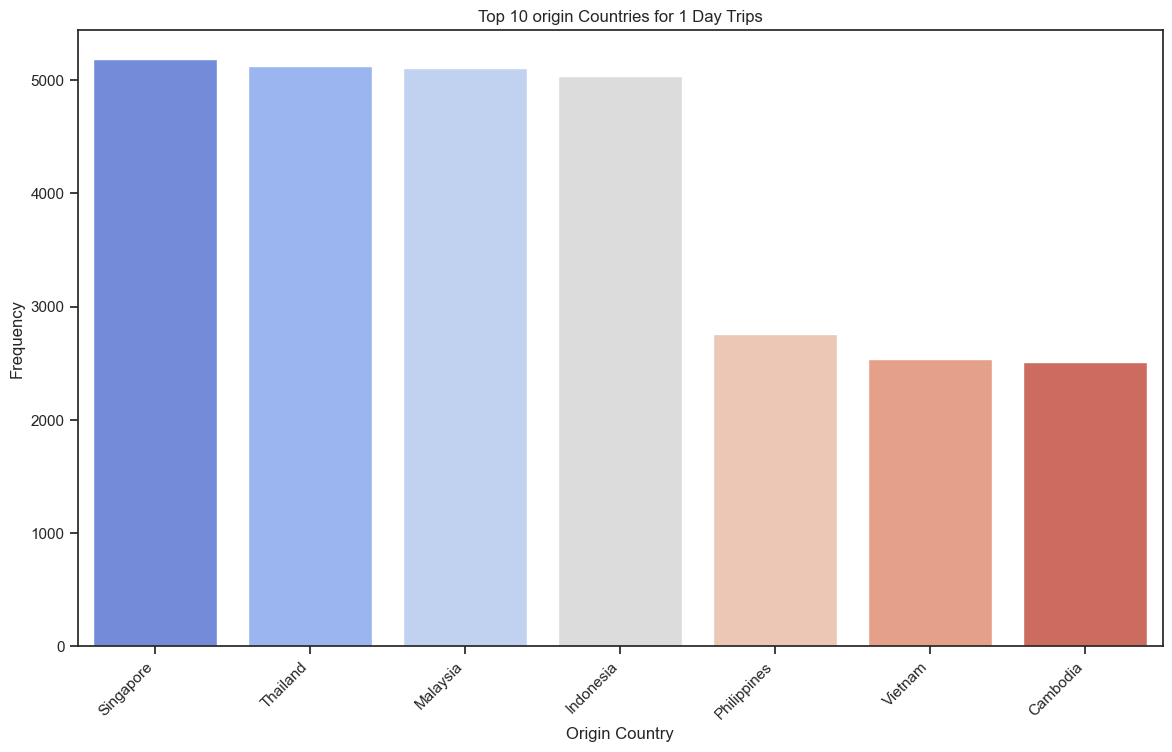

In [180]:
# Filtering data for stays of 1 day
stay_1_day_data_or = dfhotel_no_dup[dfhotel_no_dup['Stay Duration Group'] == '1 day']

# Getting the top 10 destination cities for 1 day trips
top_10_countries_or = stay_1_day_data_or['Origin Country'].value_counts().head(10)

# Count plot for the top 10 destination cities

plt.figure(figsize=(14, 8))
sns.barplot(x=top_10_countries_or.index, y=top_10_countries_or, palette='coolwarm')

plt.title('Top 10 origin Countries for 1 Day Trips')
plt.xlabel('Origin Country')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability

plt.savefig('Top 10 Origin Countries for 1 Day Trips')
plt.show()



# <span style="font-size:16px; color:black;">It indicates that eventough destination country is has not big difference inchoosing one day booking , Origin country does</span>

In [169]:
dfhotel_no_dup.to_csv(os.path.join(path, 'Data set', 'Prepared', 'Df_hotel_cleaned_final.csv'))